# Heart Failure Mortality Prediction
---


## Introduction
Author : Hafidzati Hikmadani <br>


## Dataset
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

__Attributes :__
1. age
2. anaemia : Decrease of red blood cells or hemoglobin (no anemia=0 , has anemia=1|)
3. creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
4. diabetes  : If the patient has diabetes (no diabetes =0 , has diabetes = 1)
5. ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure  :If the patient has hypertension (no hypertension = 0 , has hypertension=1)
7. platelets : Platelets in the blood (kiloplatelets/mL)
8. serum_creatinine : Level of serum creatinine in the blood (mg/dL)
9. serum_sodium : Level of serum sodium in the blood (mEq/L)
10. sex : woman or man (female=0 , male =1)
11. smoking ( no smoking=0, smoking =1)
12. time : Follow-up period (days)
13. death_event ( not dead=0 , dead=1)



_Citation_<br>
_Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). [Link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)_


You could download dataset from [here](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).<br>


## Goals

Goals of this notebook is to create a model that could predict mortality caused by Heart Failure and found out how the mortality trends against age , gender and others cormobid disease.

## Import Library

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings


from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


## Data Loading

In [260]:
#Load Data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [261]:
#Preview data
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [262]:
#Show datashape
print(data.shape)

(299, 13)


We have 13 attributes in dataset with 299 data row.

In [263]:
#Show properties info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In dataset we have all dataset already numerical type including some might categories attributes info (such as anemia,diabetes, high_blood_pressure, sex, smoking, death_event) in dataset before are represented in boolean.

## Data Cleaning

In [264]:
#Copy dataset
df = data.copy()

In [265]:
#Check missing values of all attributes
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We don't have any missing values.

In [266]:
#Check duplicate rows
df.duplicated().sum()

0

We also dont have any duplicate values

## Data Exploration

### Data Distribution

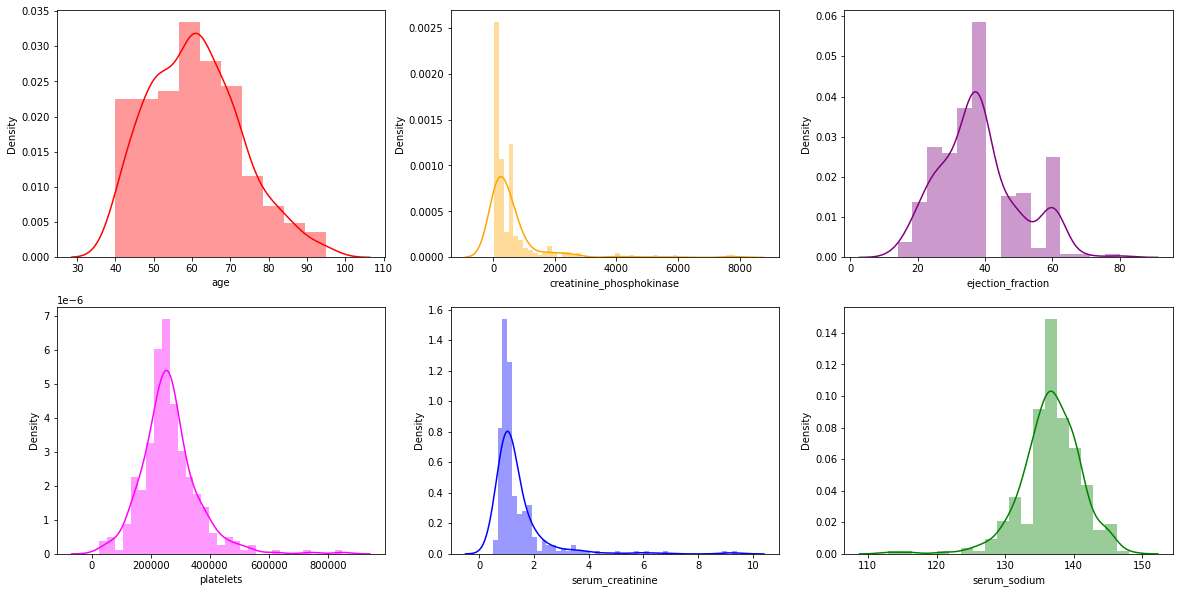

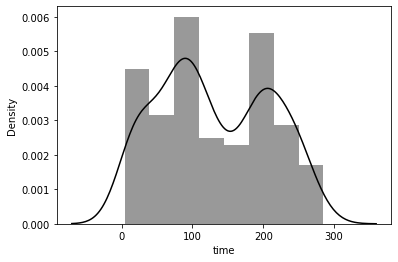

In [267]:
# Distribution of numerical data
attr_num = df[['age','creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

#Graph
warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(2,3, figsize=(20,10))

sns.distplot(attr_num['age'], ax=ax[0,0], color='red');
sns.distplot(attr_num['creatinine_phosphokinase'], ax=ax[0,1], color='orange');
sns.distplot(attr_num['ejection_fraction'], ax=ax[0,2], color='purple');
sns.distplot(attr_num['platelets'], ax=ax[1,0], color='magenta');
sns.distplot(attr_num['serum_creatinine'], ax=ax[1,1], color='blue');
sns.distplot(attr_num['serum_sodium'], ax=ax[1,2], color='green');
plt.show()

sns.distplot(attr_num['time'], color='black');
plt.show()

From above data , almost all of numeric attributes tend to normally distributed but has some skeweness.

For example the age attributes it has variance age between 40-95 years old but the most frequency of age who has Heart Failure is at range 50-70.

Meanwhile we could see Level of the CPK enzyme in the blood of patient who has Heart Failer , has high variance between 0 - 8000. But, the data is mostly appear at CPK enzyme level range 0 - 250.

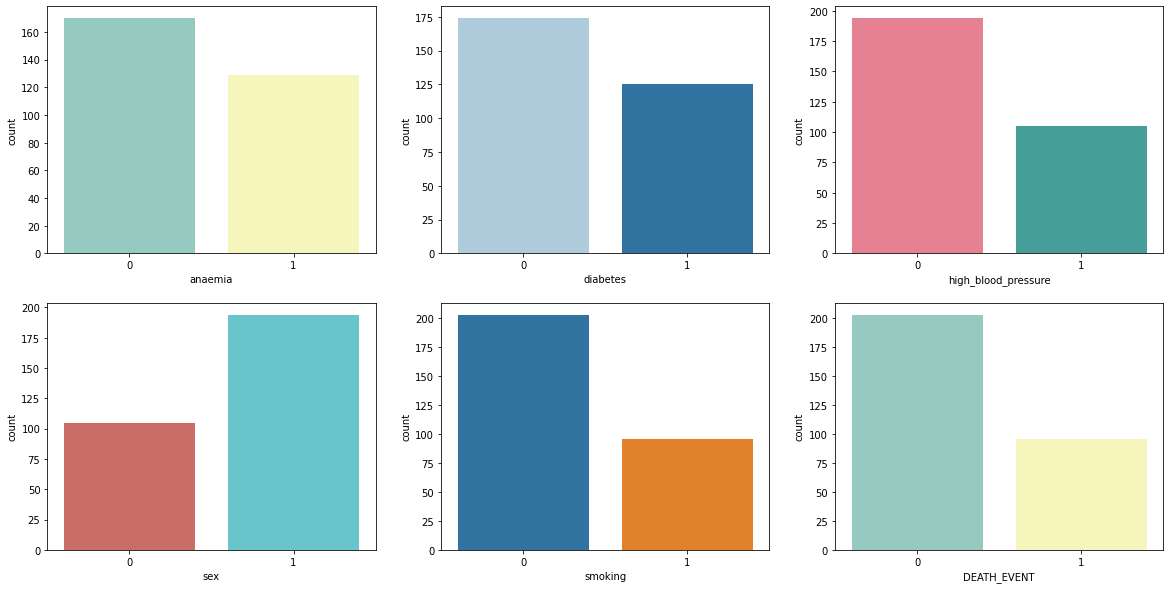

In [268]:
# Distribution of categorical data
attr_cat = df[[ 'anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking',  'DEATH_EVENT']]

#Graph
warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(2,3, figsize=(20,10))

sns.countplot(data=attr_cat, x="anaemia", ax=ax[0,0], palette="Set3");
sns.countplot(data=attr_cat, x="diabetes", ax=ax[0,1], palette="Paired");
sns.countplot(data=attr_cat, x="high_blood_pressure", ax=ax[0,2], palette="husl");
sns.countplot(data=attr_cat, x="sex", ax=ax[1,0], palette="hls");
sns.countplot(data=attr_cat, x="smoking", ax=ax[1,1], palette="tab10");
sns.countplot(data=attr_cat, x="DEATH_EVENT", ax=ax[1,2], palette="Set3");

From above data , we could see man is tend to have heart failure than woman. Mostly who has heart failure is not a smoker or doesn't have anaemia or diabetes or hypertension.

Meanwhile the death frequency beacuse of heart failure reach a half of the survived case.

### Visualization

Here we want to find out the most mortality happened because heart failure.

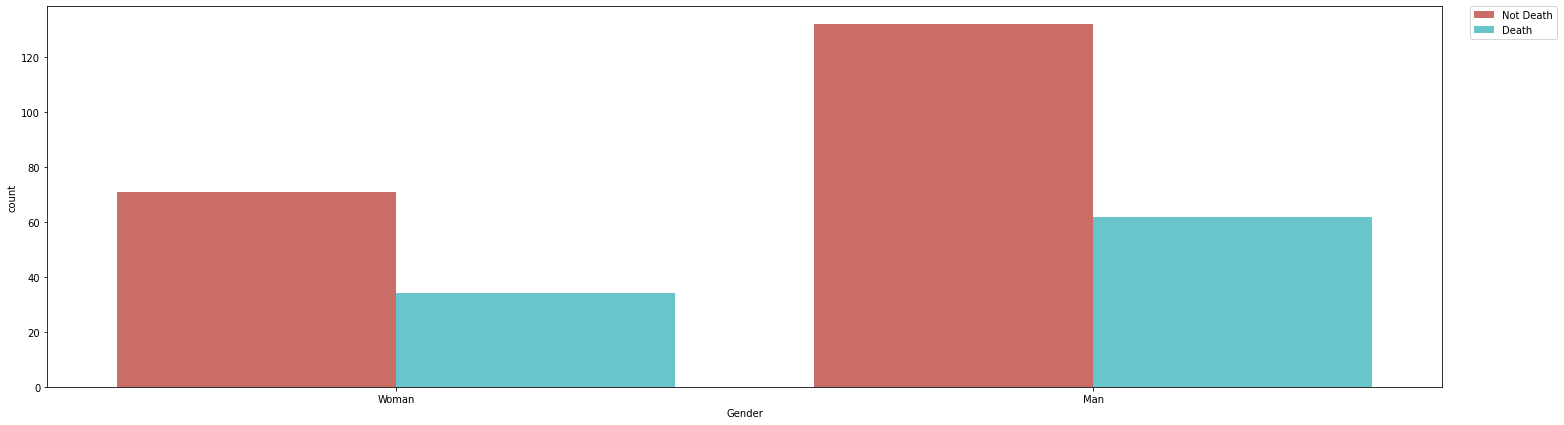

In [269]:
#Query1
q1 = df[["DEATH_EVENT","sex"]]

plt.figure(figsize=(25,7));
g1 =sns.countplot(data=q1, x="sex",  palette="hls", hue="DEATH_EVENT")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 , labels=['Not Death', 'Death'])
g1.set_xticklabels(['Woman', 'Man'])
plt.xlabel("Gender")
plt.show()


We could conclude, mortality because heart failure is dominated by men.

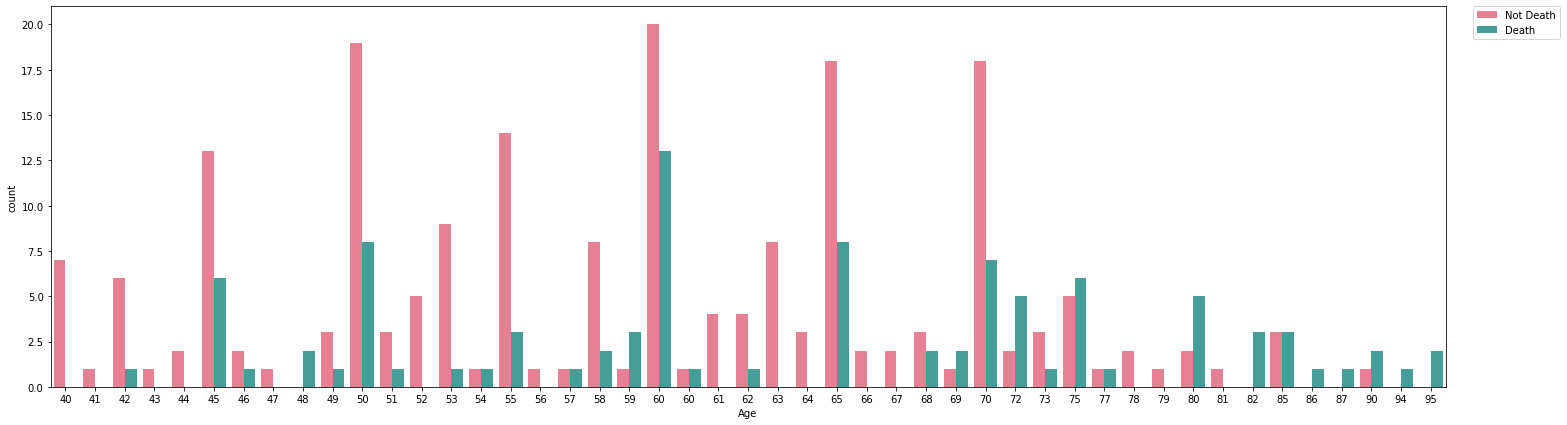

In [270]:
#Query2
q2 = df[["DEATH_EVENT","age"]]


plt.figure(figsize=(25,7));
g2 = sns.countplot(data=q2, x="age",  palette="husl", hue="DEATH_EVENT")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labels=['Not Death', 'Death'])
g2.set_xticklabels(sorted(df['age'].unique().astype(int)))
plt.xlabel("Age")
plt.show()


From above graph, we could see the most mortality is happened in age 60 . While in age above 85 , it almost possible to safe from heart failure.

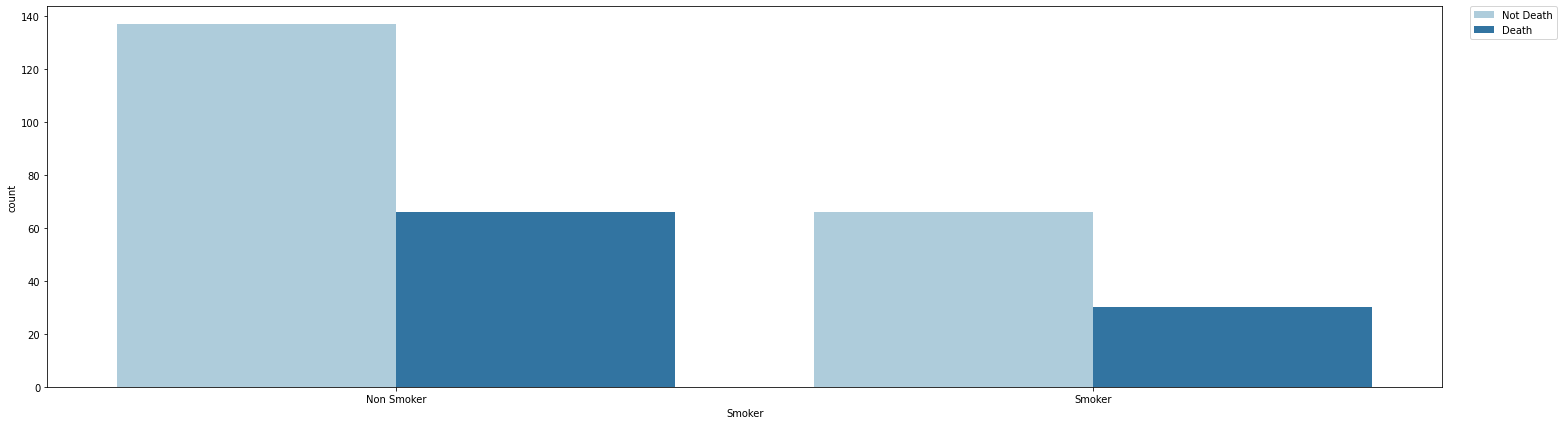

In [271]:
#Query3
q3 = df[["DEATH_EVENT","smoking"]]

plt.figure(figsize=(25,7));
g3 = sns.countplot(data=q3, x="smoking",  palette="Paired", hue="DEATH_EVENT");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labels=['Not Death', 'Death']);
g3.set_xticklabels(['Non Smoker', 'Smoker'])
plt.xlabel("Smoker")
plt.show()


Mortality due to heart failure mostly happening to non smoker person.We could conclude, smoking might not affecting the mortality.

In [272]:
#query 4

print("Total Death with Cormobid Disease : ",df[((df['anaemia'] == 1) | (df['diabetes'] == 1) | (df['high_blood_pressure'] == 1)) & (df["DEATH_EVENT"] == 1)]
      [["DEATH_EVENT","anaemia","diabetes","high_blood_pressure"]]['DEATH_EVENT'].count())
print("Total Death                       : ", df[df["DEATH_EVENT"] == 1]["DEATH_EVENT"].count())

Total Death with Cormobid Disease :  77
Total Death                       :  96


From above query, we could see there are 77 death because of heart failure from 96 which has some cormobid disease , either anaemie, diabetes or hypertension.

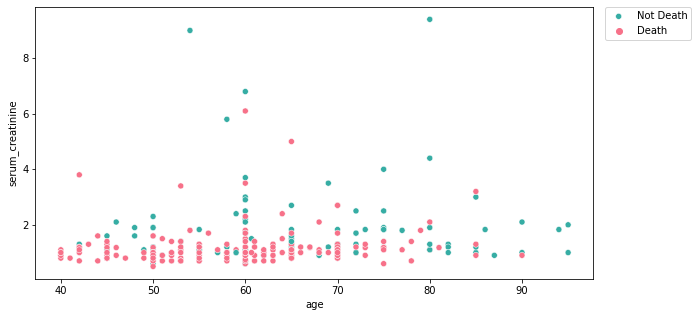

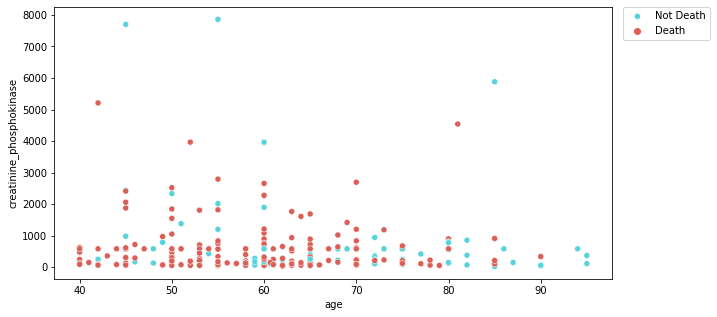

In [273]:
#Query 5
df5 = df[df["DEATH_EVENT"] ==1 ]

plt.figure(figsize=(10,5))
g5 = sns.scatterplot(data = df , x="age", y= "serum_creatinine", hue="DEATH_EVENT", palette="husl")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labels=['Not Death', 'Death']);
plt.show()

#Query 6
df6 = df[df["DEATH_EVENT"] ==1 ]

plt.figure(figsize=(10,5))
sns.scatterplot(data = df , x="age", y= "creatinine_phosphokinase", hue="DEATH_EVENT", palette='hls')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, labels=['Not Death', 'Death']);
plt.show()

From above scater plot, we could see age is not much affecting the level of serum creatinine and creatinine phosphokinase human. 

But from death event tend to has high level serum creatinine . While creatinine phospokinase might not caused the death.

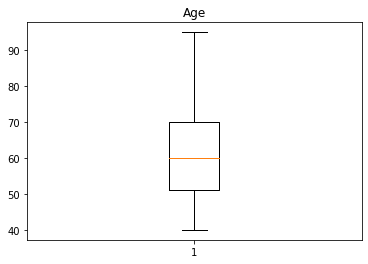

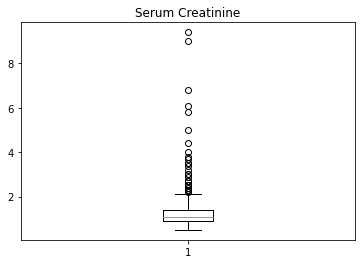

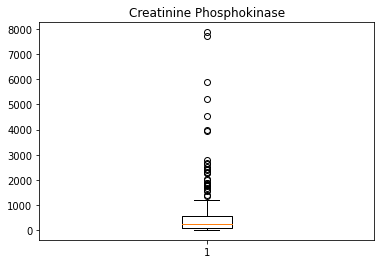

In [274]:
#Boxplot age
plt.boxplot(df['age'])
plt.title("Age")
plt.show()

#Boxplot serum creatinine
plt.boxplot(df['serum_creatinine'])
plt.title("Serum Creatinine")
plt.show()

#Boxplot creatinine phosphokinase
plt.boxplot(df['creatinine_phosphokinase'])
plt.title("Creatinine Phosphokinase")
plt.show()

From above boxplot, we could conclude that people with heart failure is distributed well from age perspective.

While from level of Serum Creatinine and Creatinine Phosphokinase, there are some outlier in dataset. It might some odd event from human body which might happend in real life.

## Data PreProcessing

### Feature Selection

Since all the attributes in dataset already has numeric value, here we will decide the feature used in model using correlation between the features against the target data.

Our target data is DEATH_EVENT and features is the rest attributes.

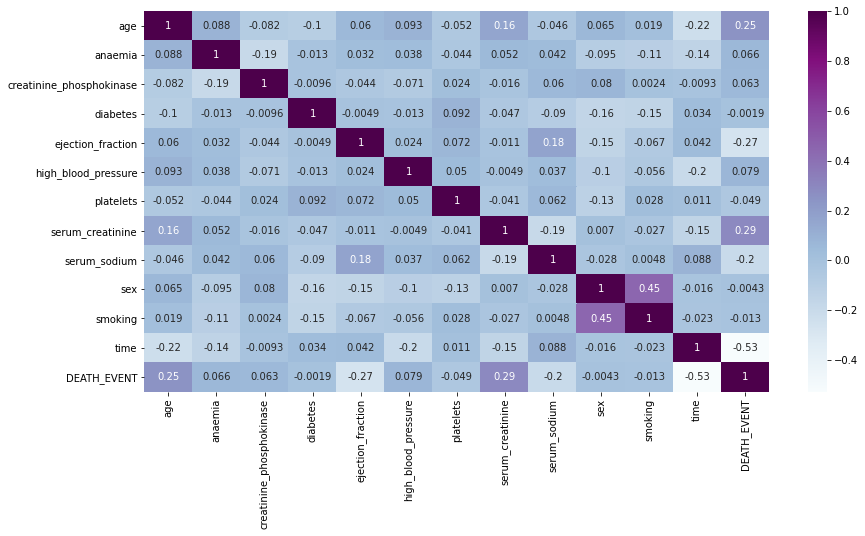

In [275]:
#Calculate correlation
corr = df.corr()

#Graph
plt.figure(figsize=(14,7))
sns.heatmap(corr,cmap="BuPu",annot=True);
plt.show()

Above heatmap tell us the correlation between attributes in dataset. We could see age and serum_creatinine has high correlation with DEATH_EVENT followed by anaemia, creatinine_phospokinase and high_blood_pressure

So we will ignore the rest features who has minus correlation with DEATH EVENT later for our modeling and use these 5 features with top correlation :

1. age
2. serum_creatinine
3. anaemia
4. creatinine_phosphokinase
5. high_blood_pressure


### Split Data

For our modelling, we will use 2 type of split data : 
1. split the data become train set, evaluation set and test set with proportion 10% of dataset become test set while 20% from training set become eval set.
2. 90% of data becomes our cross validation purposed.

In [276]:
#Final dataframe for modeling
df_model = df[["age","serum_creatinine", "anaemia", "creatinine_phosphokinase","high_blood_pressure" ,"DEATH_EVENT"]]

#split data to train ,test and sample
datamodel , test_df = train_test_split(df_model, test_size=0.1, random_state=2,  shuffle=True , stratify=df_model['DEATH_EVENT'])
train_df , eval_df = train_test_split(datamodel, test_size=0.2, random_state=4 , shuffle=True , stratify=datamodel['DEATH_EVENT'])

test_df = test_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
eval_df = eval_df.reset_index(drop=True)

print("Total of training data   : ", train_df.shape[0])
print("Total of evaluation data : ", eval_df.shape[0])
print("Total of testing  data   : ", test_df.shape[0])
print("Total cv data            : ", datamodel.shape[0])

Total of training data   :  215
Total of evaluation data :  54
Total of testing  data   :  30
Total cv data            :  269


We have 215 data for training set, 54 data for evaluation set and 30 data for testing set and also 269 data for cross validation purposes.

### Divide Dataset Features and Target

In [277]:
#split data from its feature and target for training data
X_train_us = train_df.drop(['DEATH_EVENT'], axis=1)
y_train = pd.DataFrame(train_df['DEATH_EVENT'],columns=['DEATH_EVENT'])

#split data from its feature and target for eval data 
X_eval_us = eval_df.drop(['DEATH_EVENT'], axis=1)
y_eval = pd.DataFrame(eval_df['DEATH_EVENT'], columns=['DEATH_EVENT'])

#split data from its feature and target for datamodel
X_datamodel_us = datamodel.drop(['DEATH_EVENT'], axis=1)
y_datamodel = pd.DataFrame(datamodel['DEATH_EVENT'], columns=['DEATH_EVENT'])

### Scaling Data

In [278]:
#define scaler for data
f_scaler = MinMaxScaler()
cv_scaler = MinMaxScaler()

#fit the scaling
f_scaler.fit(X_train_us)

#Transform train data
X_train = pd.DataFrame(f_scaler.transform(X_train_us), columns=X_train_us.columns)

#Transform eval data
X_eval = pd.DataFrame(f_scaler.transform(X_eval_us), columns=X_eval_us.columns)

#Transform eval data
X_datamodel = pd.DataFrame(cv_scaler.fit_transform(X_datamodel_us), columns=X_datamodel_us.columns)


## Model Definition

In this section, we will define our model data. At previous Data Preprocessing we already have 5 features and 1 target of data to process. And also we've already split the dataset to train and test data. Features are the variable/column that might give an effect to our target variable. Below are our target data and features.

Target    : DEATH_EVENT <br>

Features :
1. age
2. serum_creatinine
3. anaemia
4. creatinine_phosphokinase
5. high_blood_pressure

As our goals to predict mortality caused by Heart Failure, we will use Classification for our modeling. But here we will try to make several option of model and find out the best model that fit our expectation.

We decide to take some example of Classification model and its Tunning Version then compared these to choose the best model :
1. Model 1 : Random Forest
2. Model 2 : Bagging Decision Tree
3. Model 3 : Bagging Random Forest
4. Model 4 : Bagging SVC
5. Model 5 : AdaBoosting
6. Model 6 : AdaBoosting SVC
7. Model 7 : AdaBoosting Decision Tree
8. Model 8 : AdaBoosting RandomForest
9. Model 9 : Gradient Boosting

### Model 1 : Random Forest

#### Model Definition


In [279]:
#Define the model
rnd_fr = RandomForestClassifier(n_estimators=100, max_leaf_nodes=8 ,random_state=42)

#### Model Training

In [280]:
#train the model with our data train
rnd_fr.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p1 = pd.DataFrame(rnd_fr.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p1 = pd.DataFrame(rnd_fr.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
rnd_fr_val_scores = cross_val_score(rnd_fr, X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)


#### Model Evaluation

In [282]:
#Check accuracy
acc_train1 = accuracy_score(y_train, y_train_p1)
acc_eval1 = accuracy_score(y_eval, y_eval_p1)
acc_cv1 = (np.mean(rnd_fr_val_scores))

print("Accuracy Train Score :",acc_train1)
print("Accuracy Eval        :",acc_eval1)
print("Accuracy Train CV    :",acc_cv1)

Accuracy Train Score : 0.8186046511627907
Accuracy Eval        : 0.7777777777777778
Accuracy Train CV    : 0.7397624039133472


Random Forest has fair accuracy for evaluation data and it's cross validation accuracy almost same with the eval data.

### Model 2 : Bagging Decision Tree

#### Model Definition


In [283]:
#Define the model
bag_dct = BaggingClassifier(
    DecisionTreeClassifier(criterion="gini", max_depth=8),
    n_estimators=100, random_state=42)

#### Model Training

In [284]:
#train the model with our data train
bag_dct.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p2 = pd.DataFrame(bag_dct.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p2 = pd.DataFrame(bag_dct.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
bag_dct_val_scores = cross_val_score(bag_dct, X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)



#### Model Evaluation

In [285]:
#Check accuracy
acc_train2 = accuracy_score(y_train, y_train_p2)
acc_eval2 = accuracy_score(y_eval, y_eval_p2)
acc_cv2 = (np.mean(bag_dct_val_scores))

print("Accuracy Train Score :",acc_train2)
print("Accuracy Eval        :",acc_eval2)
print("Accuracy Train CV    :",acc_cv2)

Accuracy Train Score : 0.9395348837209302
Accuracy Eval        : 0.7777777777777778
Accuracy Train CV    : 0.7062893081761007


Bagging Decision Tree has good accuracy in trian , but it has low accuracy in eval. It tend to overfit .

From cross validation perspective it has same accuracy with RandomForest.

### Model 3 : Bagging Random Forest

#### Model Definition


In [286]:
#Define the model
bag_rfs = BaggingClassifier(
    RandomForestClassifier(max_leaf_nodes=8),
    n_estimators=100, random_state=42, oob_score=True)

#### Model Training

In [287]:
#train the model with our data train
bag_rfs.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p3 = pd.DataFrame(bag_rfs.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p3 = pd.DataFrame(bag_rfs.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
bag_rfs_val_scores = cross_val_score(bag_rfs,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)



#### Model Evaluation

In [288]:
#Check accuracy
acc_train3 = accuracy_score(y_train, y_train_p3)
acc_eval3 = accuracy_score(y_eval, y_eval_p3)
acc_cv3 = (np.mean(bag_rfs_val_scores))

print("Accuracy Train Score :",acc_train3)
print("Accuracy Eval        :",acc_eval3)
print("Accuracy Train CV    :",acc_cv3)

Accuracy Train Score : 0.7953488372093023
Accuracy Eval        : 0.7962962962962963
Accuracy Train CV    : 0.7322152341020265


Eventhough Bagging RandomForest doesnt have high acccuracy, between train , eval and cross validation accuracy it tend to same and more stable.

### Model 4 : Bagging SVC

#### Model Definition


In [289]:
#Define the model
bag_svc = BaggingClassifier(
    SVC(probability=True, kernel='rbf',C=0.001),
    n_estimators=100, random_state=42)

#### Model Training

In [290]:
#train the model with our data train
bag_svc.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p4 = pd.DataFrame(bag_svc.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p4 = pd.DataFrame(bag_svc.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
bag_svc_val_scores = cross_val_score(bag_svc,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)



#### Model Evaluation

In [291]:
#Check accuracy
acc_train4 = accuracy_score(y_train, y_train_p4)
acc_eval4 = accuracy_score(y_eval, y_eval_p4)
acc_cv4 = (np.mean(bag_svc_val_scores))

print("Accuracy Train Score :",acc_train4)
print("Accuracy Eval        :",acc_eval4)
print("Accuracy Train CV    :",acc_cv4)


Accuracy Train Score : 0.6976744186046512
Accuracy Eval        : 0.7037037037037037
Accuracy Train CV    : 0.6839972047519217


Same with Bagging Random Forest, Bagging SVC tend to have stable accuracy but it's worse than bagging random forest.

### Model 5 : AdaBoosting

#### Model Definition


In [292]:
#Define the model
ad = AdaBoostClassifier(n_estimators=100, random_state=42)


#### Model Training

In [293]:
#train the model with our data train
ad.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p5 = pd.DataFrame(ad.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p5 = pd.DataFrame(ad.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
ad_val_scores = cross_val_score(ad,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)



#### Model Evaluation

In [294]:
#Check accuracy
acc_train5 = accuracy_score(y_train, y_train_p5)
acc_eval5 = accuracy_score(y_eval, y_eval_p5)
acc_cv5 = (np.mean(ad_val_scores))

print("Accuracy Train Score :",acc_train5)
print("Accuracy Eval        :",acc_eval5)
print("Accuracy Train CV    :",acc_cv5)


Accuracy Train Score : 0.8744186046511628
Accuracy Eval        : 0.7222222222222222
Accuracy Train CV    : 0.6988819007686933


AdaBoosting tend to overfit and the accuracy is decreasing in cross validation.

### Model 6 : AdaBoosting with SVC

#### Model Definition


In [295]:
#Define the model 
svc = SVC(probability=True, kernel='rbf')
adbc = AdaBoostClassifier(n_estimators=100, base_estimator=svc ,learning_rate=0.01, random_state=42)

#### Model Training

In [296]:
#train the model with our data train
adbc.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p6 = pd.DataFrame(adbc.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p6 = pd.DataFrame(adbc.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
adbc_val_scores = cross_val_score(adbc,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)


#### Model Evaluation

In [297]:
#Check accuracy
acc_train6 = accuracy_score(y_train, y_train_p6)
acc_eval6 = accuracy_score(y_eval, y_eval_p6)
acc_cv6 = (np.mean(adbc_val_scores))

print("Accuracy Train Score :",acc_train6)
print("Accuracy Eval        :",acc_eval6)
print("Accuracy Train CV    :",acc_cv6)

Accuracy Train Score : 0.6837209302325581
Accuracy Eval        : 0.7037037037037037
Accuracy Train CV    : 0.6877009084556255


AdaBoosting with SVC, doesnt have high accuracy , but it has great accuray in eval set means this model learns well before.

### Model 7 : AdaBoosting with Decision Tree

#### Model Definition


In [298]:
#Define the model 
dct = DecisionTreeClassifier(criterion="gini", max_depth=8,random_state= 42)
ad_dct = AdaBoostClassifier(n_estimators=100, base_estimator=dct ,learning_rate=0.01)


#### Model Training

In [299]:
#train the model with our data train
ad_dct.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p7 = pd.DataFrame(ad_dct.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p7 = pd.DataFrame(ad_dct.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
ad_dct_val_scores = cross_val_score(ad_dct,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)



#### Model Evaluation

In [300]:
#Check accuracy
acc_train7 = accuracy_score(y_train, y_train_p7)
acc_eval7 = accuracy_score(y_eval, y_eval_p7)
acc_cv7 = (np.mean(ad_dct_val_scores))

print("Accuracy Train Score :",acc_train7)
print("Accuracy Eval        :",acc_eval7)
print("Accuracy Train CV    :",acc_cv7)

Accuracy Train Score : 0.9953488372093023
Accuracy Eval        : 0.7592592592592593
Accuracy Train CV    : 0.6580712788259958


AdaBoosting Decision Tree is too overfit because the accuracy of train data is far away better from its eval and cross valuation and it's not good for the model.

### Model 8 : AdaBoosting with RandomForest

#### Model Definition


In [301]:
#Define the model 
rnd_fr1 = RandomForestClassifier(max_leaf_nodes=8 ,random_state=42)
ad_rfs = AdaBoostClassifier(n_estimators=100, base_estimator=rnd_fr1 ,learning_rate=0.01)

#### Model Training

In [302]:
#train the model with our data train
ad_rfs.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p8 = pd.DataFrame(ad_rfs.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p8 = pd.DataFrame(ad_rfs.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
ad_rfs_val_scores = cross_val_score(ad_rfs,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)



#### Model Evaluation

In [303]:
#Check accuracy
acc_train8 = accuracy_score(y_train, y_train_p8)
acc_eval8 = accuracy_score(y_eval, y_eval_p8)
acc_cv8 = (np.mean(ad_rfs_val_scores))

print("Accuracy Train Score :",acc_train8)
print("Accuracy Eval        :",acc_eval8)
print("Accuracy Train CV    :",acc_cv8)


Accuracy Train Score : 0.8186046511627907
Accuracy Eval        : 0.7962962962962963
Accuracy Train CV    : 0.7284416491963661


Comparing from other model before, AdaBoosting RandomForest is the best so far because it has accuracy in eval set and cross validation and also it's not that overfit.

### Model 9 : Gradient Boosting

#### Model Definition


In [304]:
#Define the model 
gbrt = GradientBoostingClassifier(n_estimators=100, max_depth= 7, learning_rate=0.01, random_state=42 , loss="exponential")

#### Model Training

In [305]:
#train the model with our data train
gbrt.fit(X_train, y_train['DEATH_EVENT'])

#predict against train data
y_train_p9 = pd.DataFrame(gbrt.predict(X_train),columns=["pred_DEATH_EVENT"])

#predict against test data
y_eval_p9 = pd.DataFrame(gbrt.predict(X_eval),columns=["pred_DEATH_EVENT"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42)
gbrt_val_scores = cross_val_score(gbrt,  X_datamodel , y_datamodel["DEATH_EVENT"], cv=skf)


#### Model Evaluation

In [306]:
#Check accuracy
acc_train9 = accuracy_score(y_train, y_train_p9)
acc_eval9 = accuracy_score(y_eval, y_eval_p9)
acc_cv9 = (np.mean(gbrt_val_scores))

print("Accuracy Train Score :",acc_train9)
print("Accuracy Eval        :",acc_eval9)
print("Accuracy Train CV    :",acc_cv9)


Accuracy Train Score : 0.9209302325581395
Accuracy Eval        : 0.7037037037037037
Accuracy Train CV    : 0.6988819007686933


Same with AdaBoosting Decision Tree, Gradient Boosting is too overfit to used because it has high accuracy in train set but low accuracy in eval set and cross validation.

### Summary Model

Below we will summarize the accuray of every model.

In [307]:
s_eval = pd.DataFrame({
    "Model" :["Random Forest","Bagging Decision Tree","Bagging Random Forest", "Bagging SVC","AdaBoosting","AdaBoosting SVC","AdaBoosting Decision Tree","AdaBoosting RandomForest","Gradient Boosting"],
    "Accuracy Train Set" :[acc_train1,acc_train2,acc_train3,acc_train4,acc_train5,acc_train6,acc_train7,acc_train8,acc_train9],
    "Accuracy Eval Set": [acc_eval1,acc_eval2,acc_eval3,acc_eval4,acc_eval5,acc_eval6,acc_eval7,acc_eval8,acc_eval9],
    "Mean Accuracy CV":[acc_cv1,acc_cv2,acc_cv3,acc_cv4, acc_cv5, acc_cv6, acc_cv7,acc_cv8,acc_cv9]
})

s_eval

,Model,Accuracy Train Set,Accuracy Eval Set,Mean Accuracy CV
0,Random Forest,0.818605,0.777778,0.739762
1,Bagging Decision Tree,0.939535,0.777778,0.706289
2,Bagging Random Forest,0.795349,0.796296,0.732215
3,Bagging SVC,0.697674,0.703704,0.683997
4,AdaBoosting,0.874419,0.722222,0.698882
5,AdaBoosting SVC,0.683721,0.703704,0.687701
6,AdaBoosting Decision Tree,0.995349,0.759259,0.658071
7,AdaBoosting RandomForest,0.818605,0.796296,0.728442
8,Gradient Boosting,0.920930,0.703704,0.698882


Above we have summary accuracy of train set, eval set and cross validation set.  We could see almost all of model has eval set and cross validation set accuracy around 0,7.

Now let's find out the best accuracy from above summary.

In [308]:
#Model with highest accuracy of eval set
s_eval[s_eval['Accuracy Eval Set'] == s_eval['Accuracy Eval Set'].max()]

,Model,Accuracy Train Set,Accuracy Eval Set,Mean Accuracy CV
2,Bagging Random Forest,0.795349,0.796296,0.732215
7,AdaBoosting RandomForest,0.818605,0.796296,0.728442


In [309]:
#Model with highest average accuracy of Cross Validation
s_eval[s_eval['Mean Accuracy CV'] == s_eval['Mean Accuracy CV'].max()]

,Model,Accuracy Train Set,Accuracy Eval Set,Mean Accuracy CV
0,Random Forest,0.818605,0.777778,0.739762


From above result, we could conclude that we have 3 model filtered :
1. Model 1 Random Forest
2. Model 3 Bagging Random Forest
3. Model 8 AdaBoosting Random Forest

Model 1 is the winner from accuracy cross validation perspective, while Model 3 and 8 is great from eval set perspective.


## Model Evaluation


In this section we will evaluate the model by comparing value of Confusion Matrics, Precision, Recall, Accuracy Score, ROC Value.

1. Confusion Matrics is value that represents total of true positive, true negatif , false positive and false negative of data that produced by the model. 
2. Precision is comparison between true positive and total of data which are predicted as positive.
3. Recall is is comparison between true positive and total of data which are actually as positive.
4. F1-Score is the harmonic mean from Precision and Recall
5. AUC Value is total probability of confusion matriks from all treshold in the model.


Recalling at previous Model Training, we deciced to just evaluate 3 models.

### Mode 1 Evaluation : Random Forest

Accuracy of Random Forest on eval set: 0.78

[[34  3]
 [ 9  8]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.73      0.47      0.57        17

    accuracy                           0.78        54
   macro avg       0.76      0.69      0.71        54
weighted avg       0.77      0.78      0.76        54


AUC Score :  0.6947535771065183



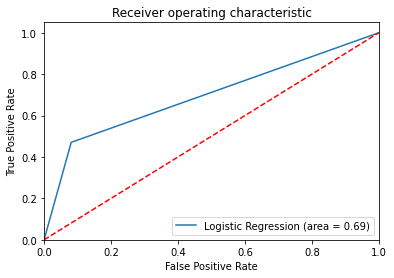

In [310]:
#Accuracy model
print('Accuracy of Random Forest on eval set: {:.2f}'.format(rnd_fr.score(X_eval, y_eval)))
print("")

#confussion matrix
confusion_matrix1 = confusion_matrix(y_eval, y_eval_p1)
print(confusion_matrix1)
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_eval, y_eval_p1))
print("")

#ROC Curve
logit_roc_auc1 = roc_auc_score(y_eval, y_eval_p1)
print("AUC Score : ", logit_roc_auc1)
print("")
fpr1, tpr1, thresholds1 = roc_curve(y_eval, y_eval_p1)
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Intepretation :

For death event context, we will more concern about the data which deat_event is true or 1.

Above evaluation tells , Random Forest has ability 0.73 to predict death event from dataset, and the ability of its model to not predict death event as not death is 0.47.

The probability of resulting confusion matrics of each treshold has fair values which 0.69.

Here we will more concern about the recall since we hoping the the model to not predict a death event as the not death event.


### Model 3 Evaluation : Bagging RandomForest

Accuracy of Random Forest on eval set: 0.80

[[36  1]
 [10  7]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.88      0.41      0.56        17

    accuracy                           0.80        54
   macro avg       0.83      0.69      0.71        54
weighted avg       0.81      0.80      0.77        54


AUC Score :  0.6923688394276629



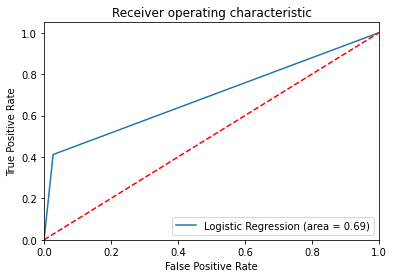

In [311]:
#Accuracy model
print('Accuracy of Random Forest on eval set: {:.2f}'.format(bag_rfs.score(X_eval, y_eval)))
print("")

#confussion matrix
confusion_matrix3 = confusion_matrix(y_eval, y_eval_p3)
print(confusion_matrix3)
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_eval, y_eval_p3))
print("")

#ROC Curve
logit_roc_auc3 = roc_auc_score(y_eval, y_eval_p3)
print("AUC Score : ", logit_roc_auc3)
print("")
fpr3, tpr3, thresholds3 = roc_curve(y_eval, y_eval_p3)
plt.figure()
plt.plot(fpr3, tpr3, label='Logistic Regression (area = %0.2f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Interpretation :

Comparing with RandomForest, Bagging RandomForest has same value of AUC Score which 0.69.

But the recall value to predict the death event from dataset is worse than RandomForest. So we could say Random Forest is better than Bagging Random Forest.

### Model 8 Evaluation : AdaBoosting RandfomForest

Accuracy of Random Forest on eval set: 0.80

[[35  2]
 [ 9  8]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.86        37
           1       0.80      0.47      0.59        17

    accuracy                           0.80        54
   macro avg       0.80      0.71      0.73        54
weighted avg       0.80      0.80      0.78        54


AUC Score :  0.7082670906200319



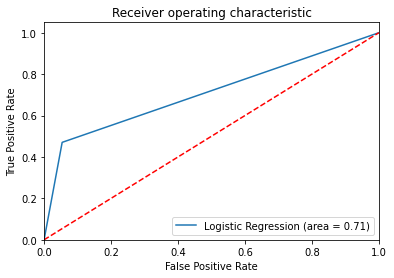

In [312]:

#Accuracy model
print('Accuracy of Random Forest on eval set: {:.2f}'.format(ad_rfs.score(X_eval, y_eval)))
print("")

#confussion matrix
confusion_matrix8 = confusion_matrix(y_eval, y_eval_p8)
print(confusion_matrix8)
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_eval, y_eval_p8))
print("")

#ROC Curve
logit_roc_auc8 = roc_auc_score(y_eval, y_eval_p8)
print("AUC Score : ", logit_roc_auc8)
print("")
fpr8, tpr8, thresholds8 = roc_curve(y_eval, y_eval_p8)
plt.figure()
plt.plot(fpr8, tpr8, label='Logistic Regression (area = %0.2f)' % logit_roc_auc8)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Interpretation :

AdaBoosting RandomForest has same ability recall with RandomForest in predicting against death event which 0.47, but this model has more pros in AUC Score is higher than 2 models before.

Not only that, the ability to predict true death event also better than others with value 0.80.

### Summary Evaluation


We could summary the intrepretation below :

1. From perspective recall (the ability to not predict death event as not death event) , AdaBoosting RandomForest and RandomForest has same ability while Bagging RandomForest is worse.
2. From perspective precision (ability to predict true death event from dataset) , AdaBoosting RandomForest is the winner than others.
3. Form perspecive of AUC Score, AdaBoosting RandomForest also the winner than others.

From above summary, we can conclude Adaboosting RandomForest is the best model from those model trained. So we will use Adaboosting RandomForest for our model.

## Model Iference

In this section we will use previous test data to try our final prediction. But before that, we need to pre process our sample data first.

In [313]:
#Define sample data
X_test_us = test_df.drop(['DEATH_EVENT'], axis=1)
y_test = pd.DataFrame(test_df['DEATH_EVENT'],columns=['DEATH_EVENT'])

#Transform eval data
X_test = pd.DataFrame(f_scaler.transform(X_test_us), columns=X_test_us.columns)


In [314]:
#Predict RainTomorrow
y_test_pred= ad_rfs.predict(X_test)

#Result
result = pd.DataFrame({"DEATH_EVENT": y_test['DEATH_EVENT'], "Pred DEAT_EVENT":y_test_pred})

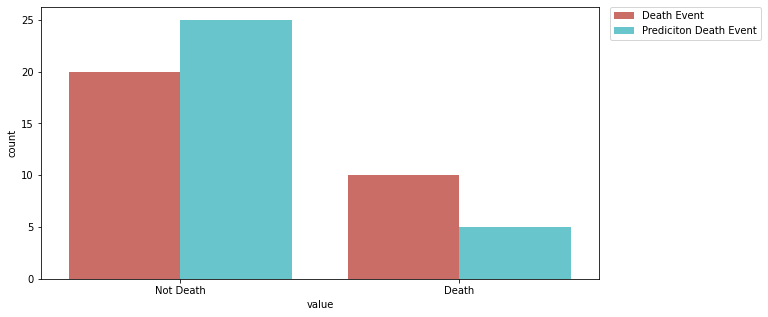

In [315]:
#Graph
gr = pd.melt(result)
plt.figure(figsize=(10,5));
g1 =sns.countplot(data=gr, x="value",  palette="hls", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 , labels=['Death Event', 'Prediciton Death Event'])
g1.set_xticklabels(['Not Death', 'Death'])
plt.show()


From recall perspective, AdaBoosting RandomForest has ability almost 0.50 not to predict the death as not death. 

Above graph we could see, prediciton from AdaBoosting model is a half from the actual death.


## Conclusion

Below the conclusion of this notebook, recalling the Goals.
1. Adaboosting RandomForest is the best model because, compared to others models, it has high ability to not predict death event because of heart failure as not death event. And also it has highest ability to predict true death event from dataset. 
2. Man are more prone to death because of heart failure.
3. Heart Failure is hapening in range age 40-95 which the most mortality is happening in age 60. It means a human must be more carefull about their health when they already meet 40 years old above.
4. Total 77 from 96 mortality is happened to person who has cormobid disease like anaemia, diabetes or hypertension. We could conclude cormobid might caused the mortality of heart failure.
